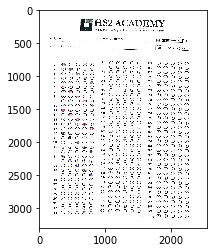

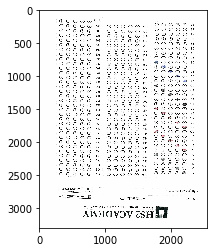

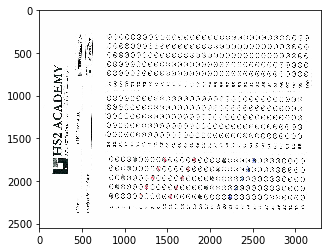

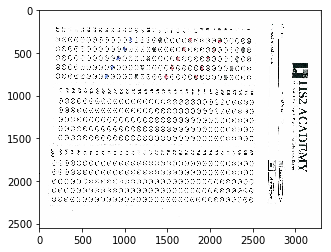

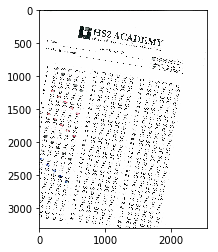

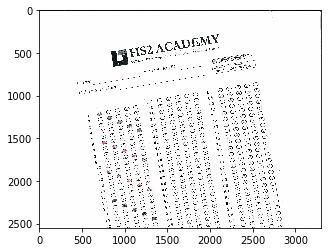

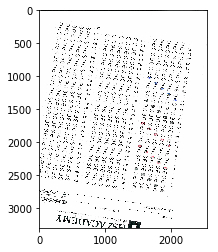

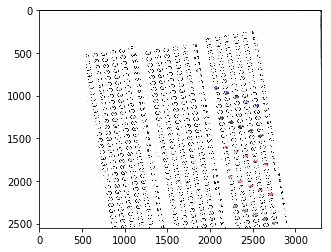

In [164]:
pdfs = !ls scantrons/*

from wand.image import Image
from io import BytesIO

import numpy as np
import skimage.io

imgs = []

for idx, pdf in enumerate(pdfs):
    with Image(filename=pdf, resolution=300) as img:
        img.format = 'bmp'
        img.alpha_channel=False
        img_buffer = np.asarray(bytearray(img.make_blob()),dtype=np.uint8)
        
        img_stringIO = BytesIO(img_buffer)
        img = skimage.io.imread(img_stringIO)            
        imgs.append(img)
        
        plt.imshow(img)
        plt.show()



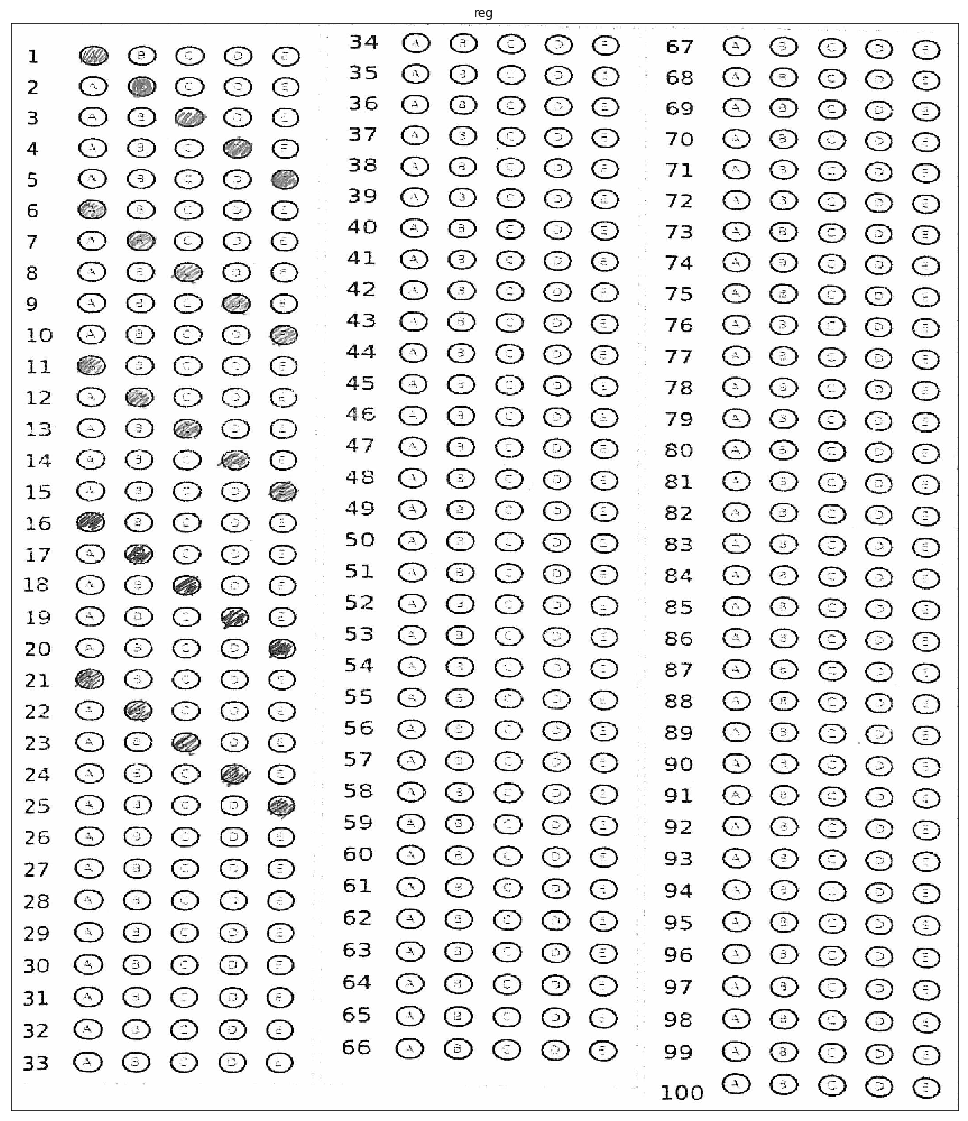

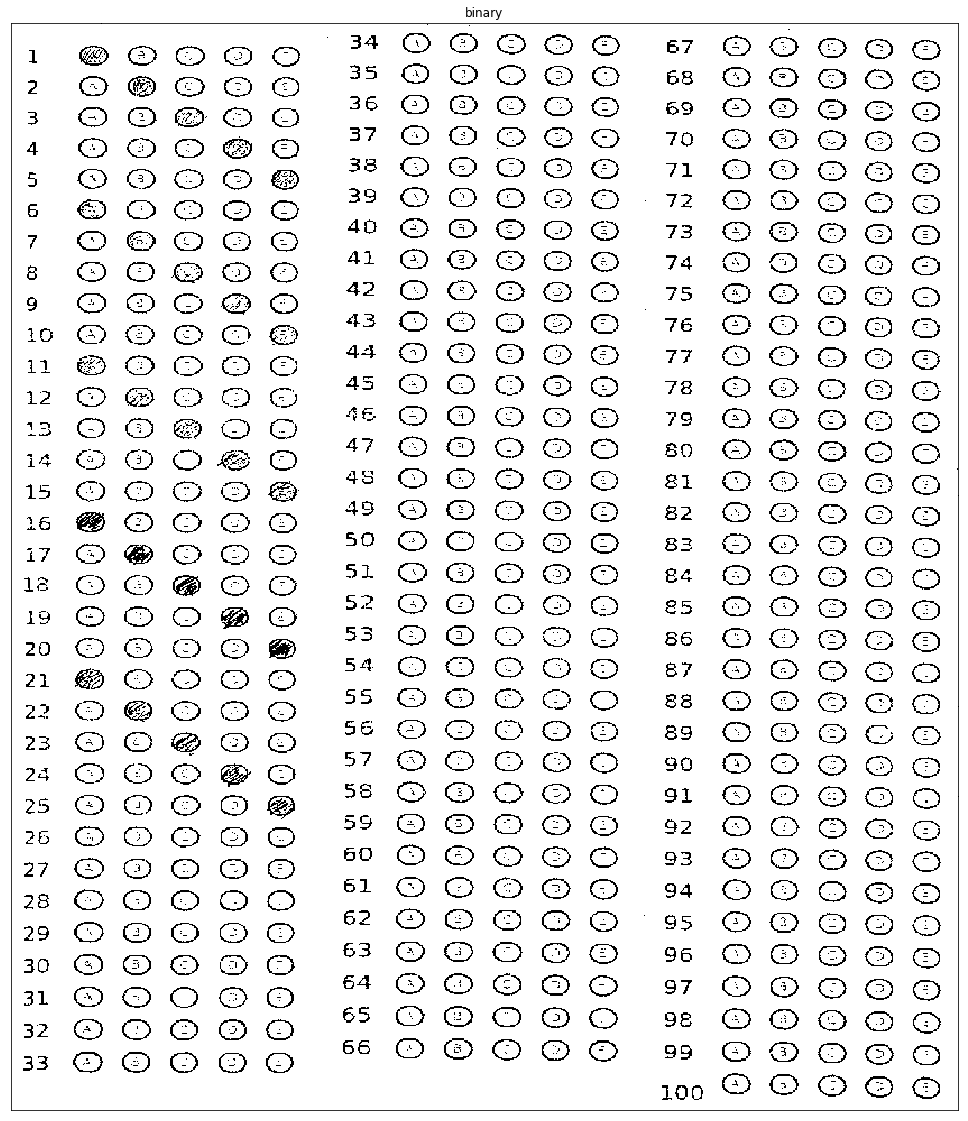

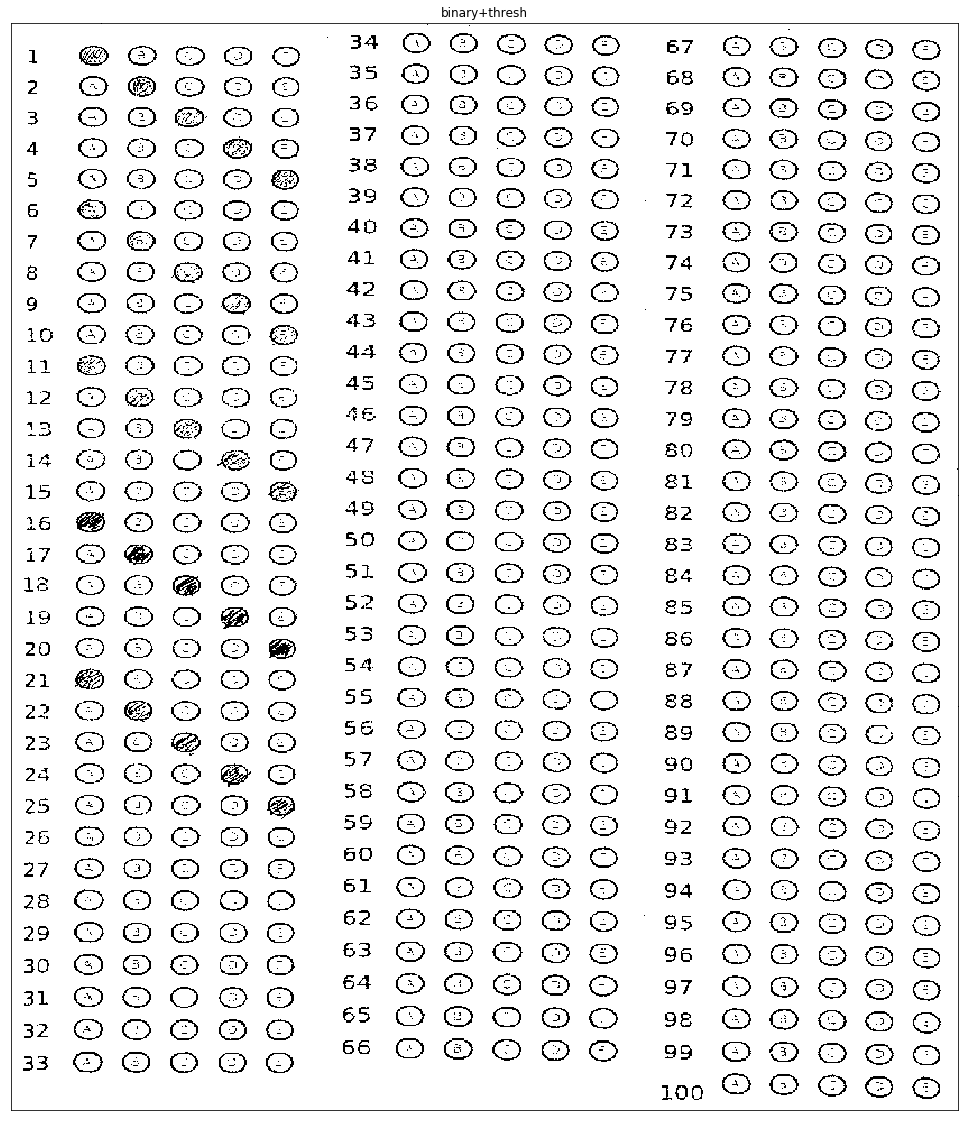

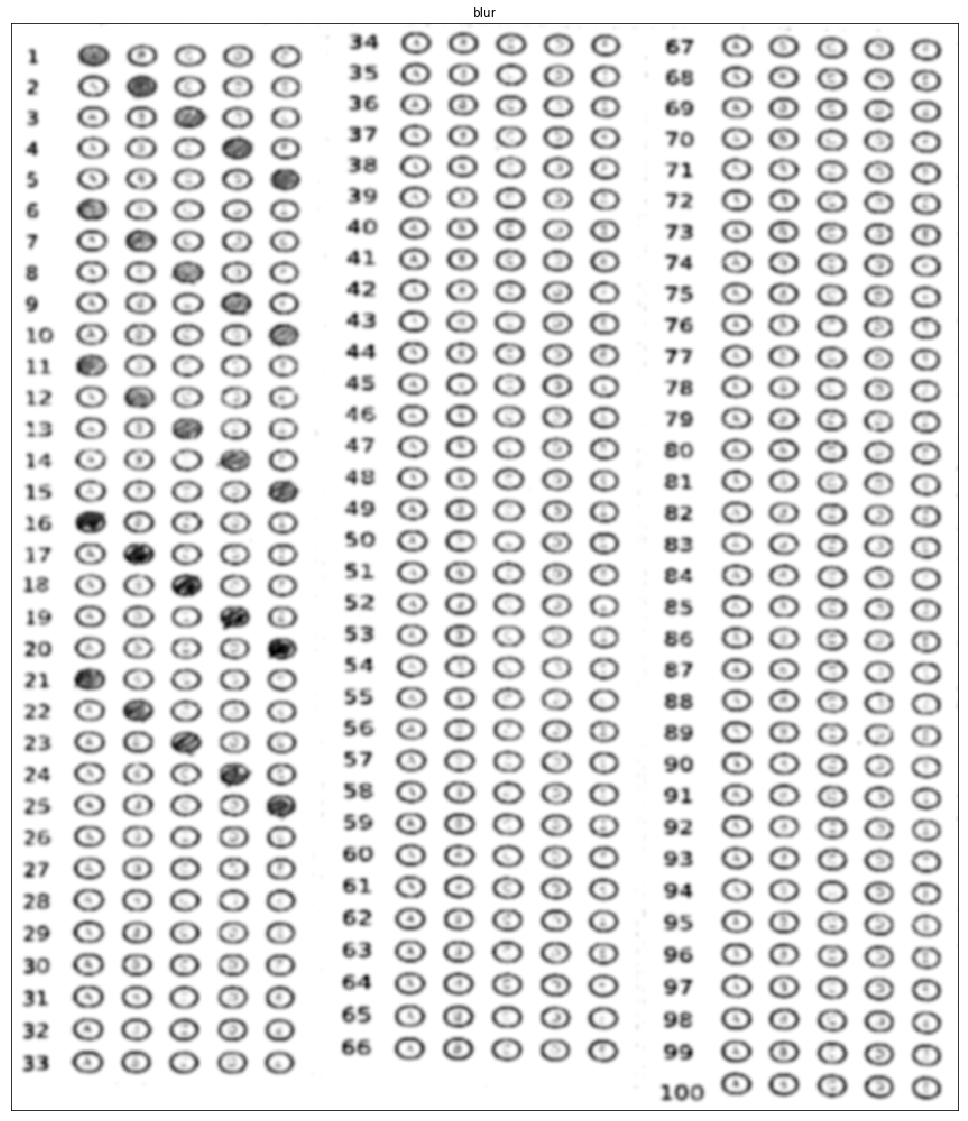

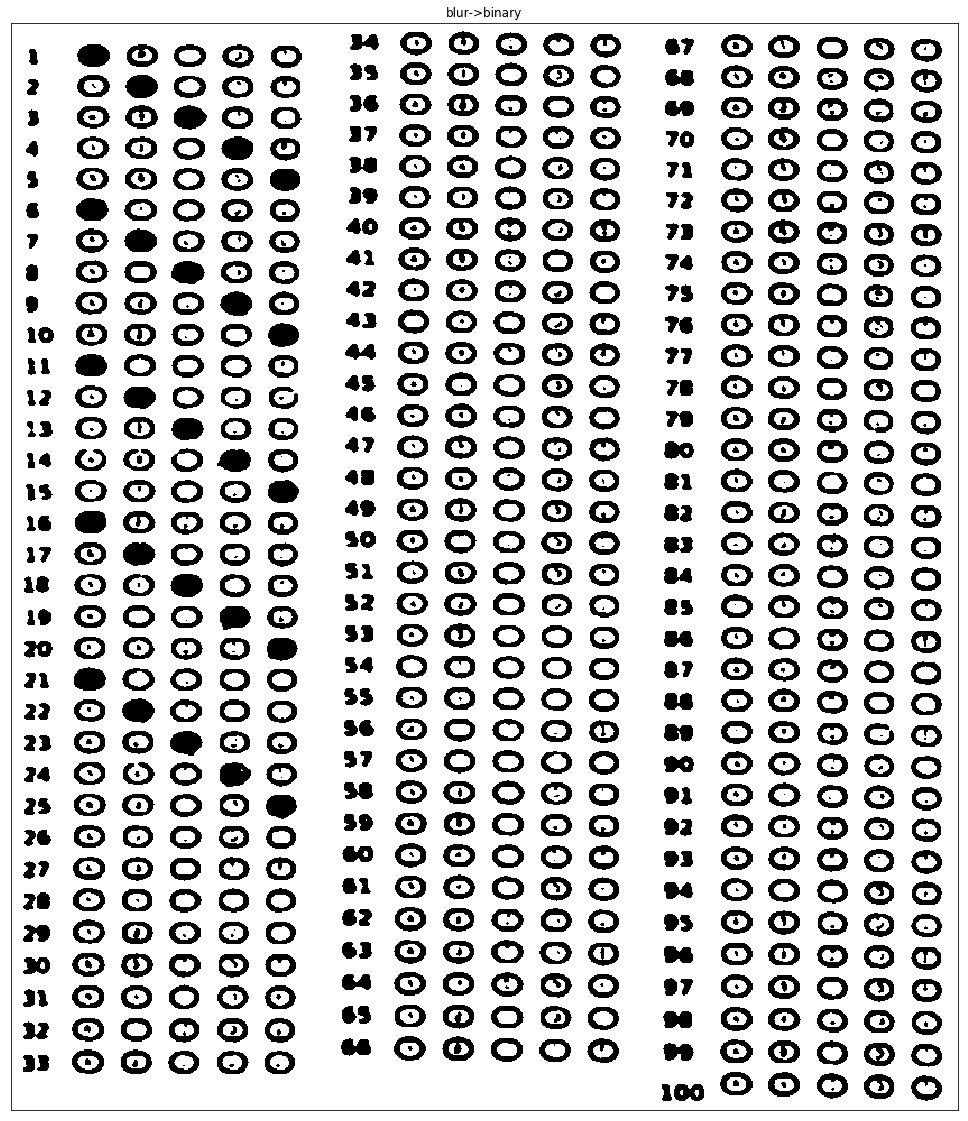

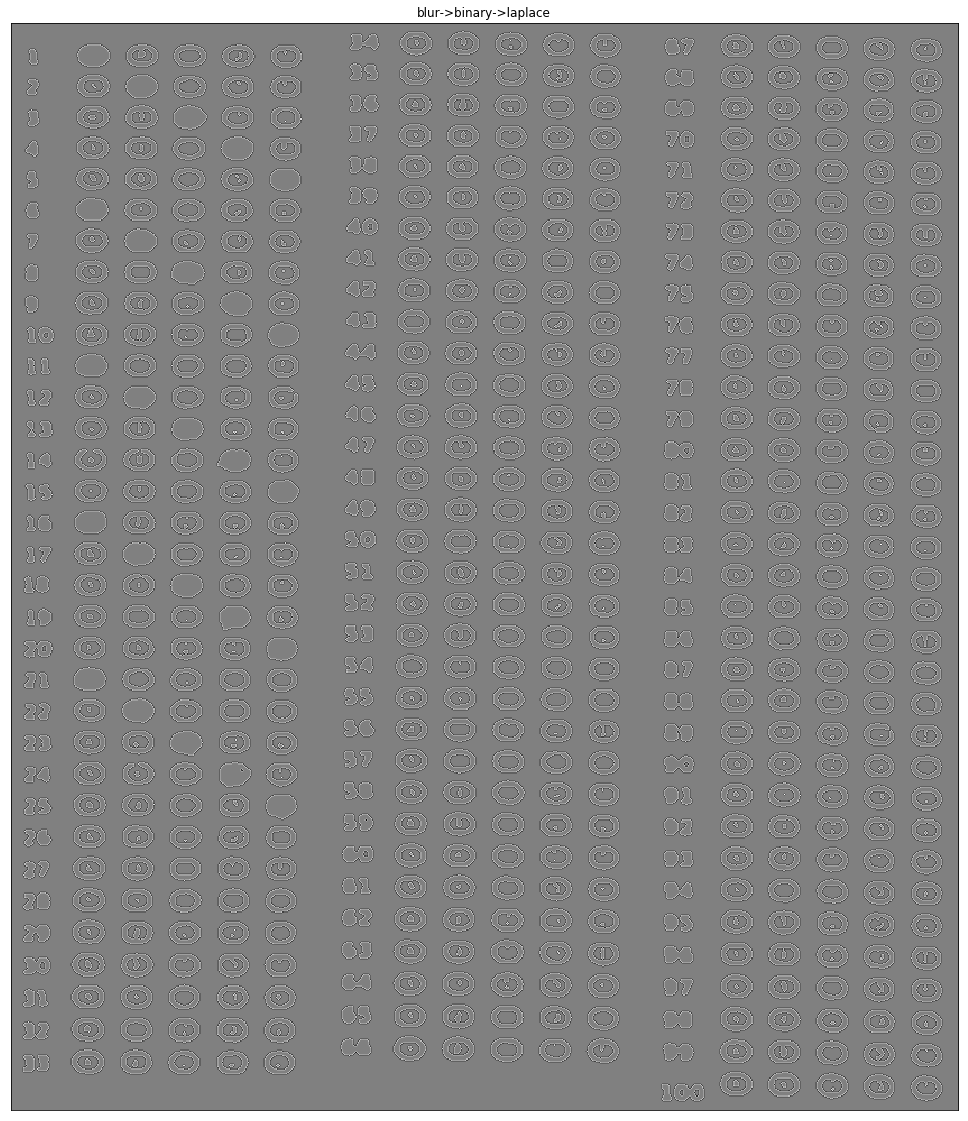

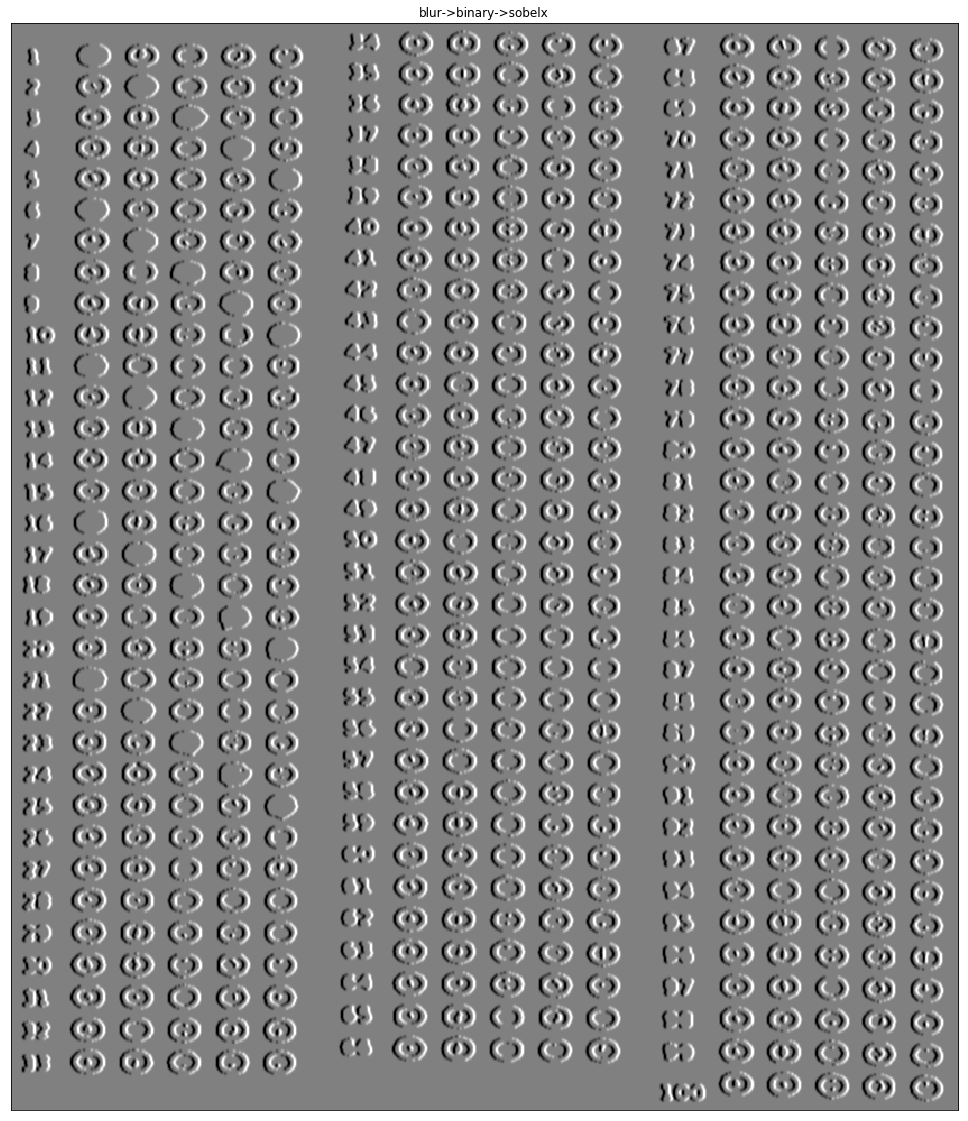

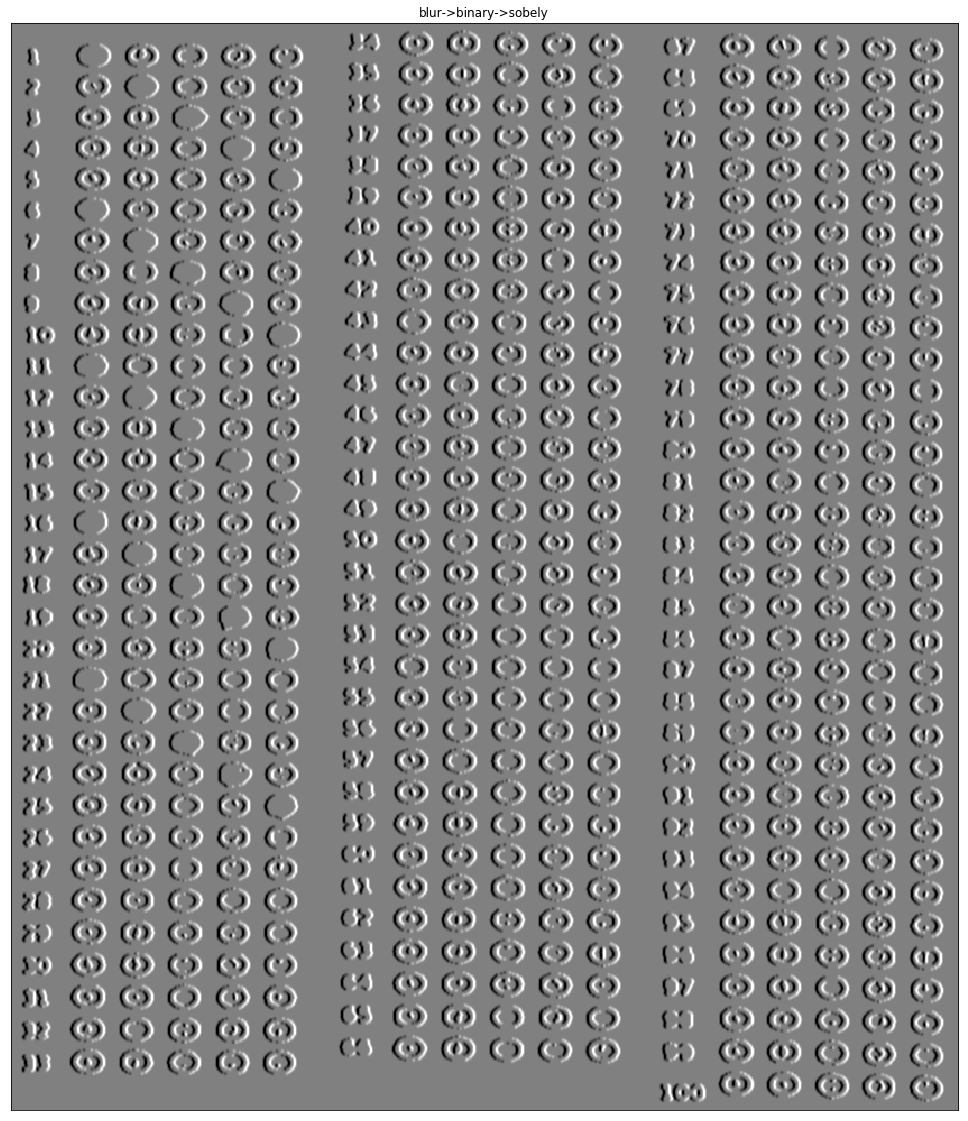

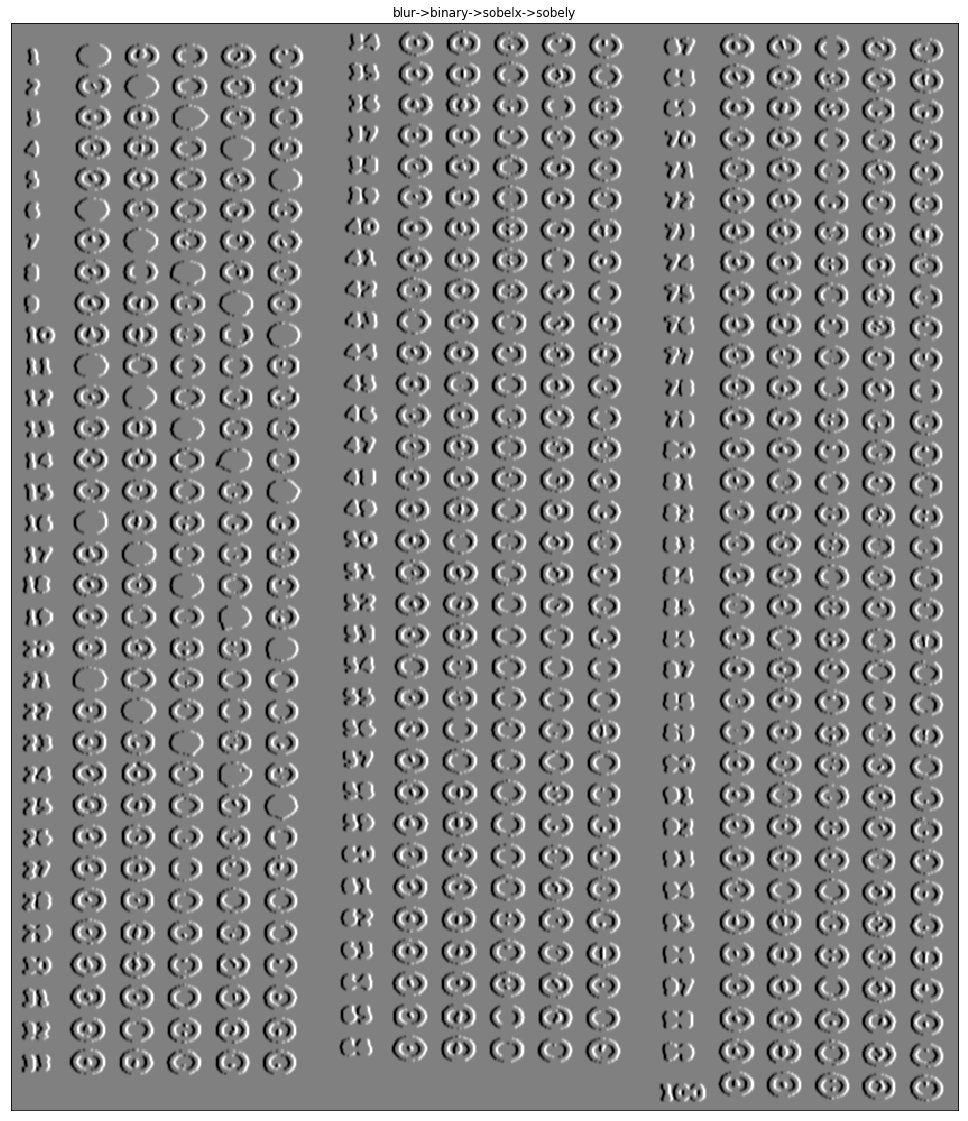

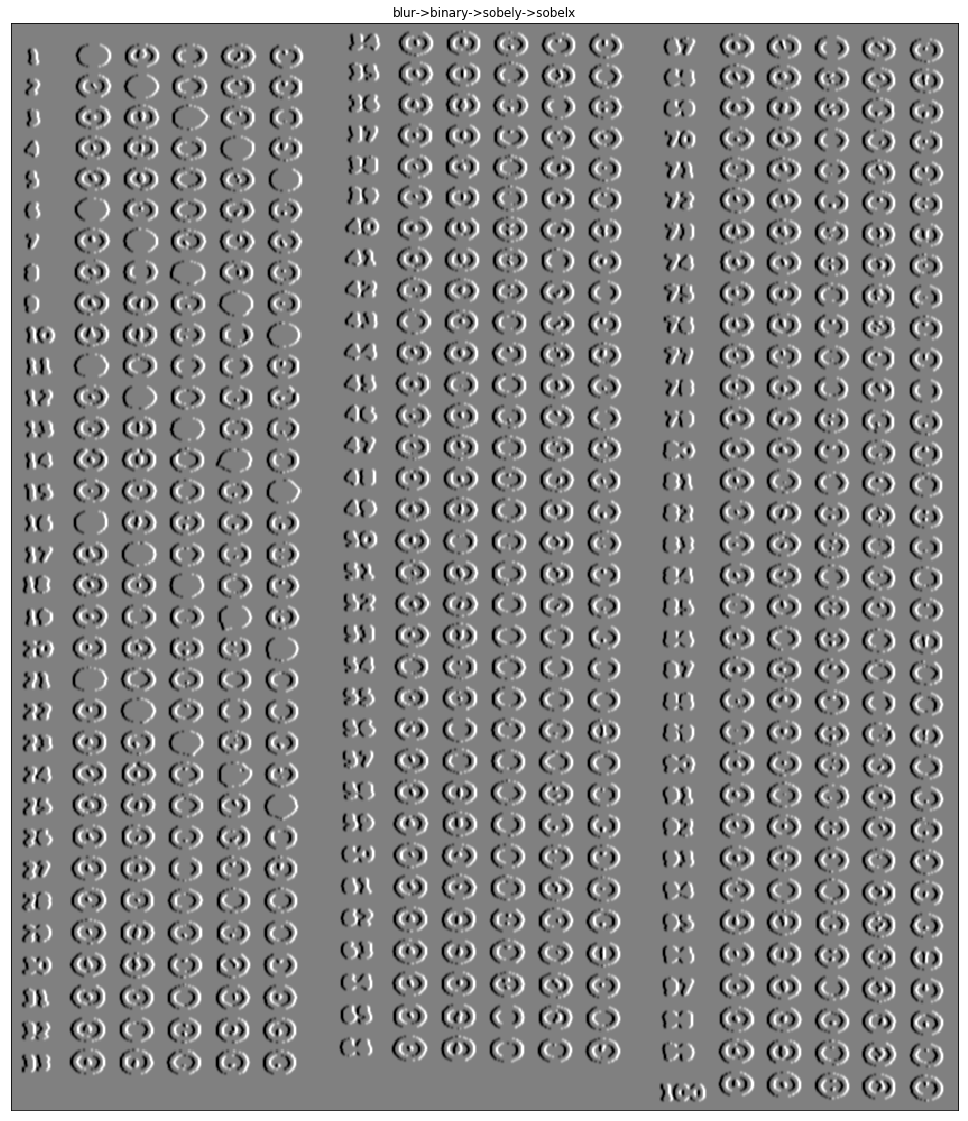

In [165]:
imgs = !ls png_scantrons/*
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(imgs[0])
img = img[300:-50,75:-100]

# b,g,r = cv2.split(img)
# img = cv2.merge([r,g,b])

output = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')
plt.title('reg')
plt.xticks([])
plt.yticks([])
plt.show()

ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.figure(figsize=(20,20))
plt.imshow(th1, cmap='gray')
plt.title('binary')
plt.xticks([])
plt.yticks([])
plt.show()

ret2,th2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(20,20))
plt.title('binary+thresh')
plt.imshow(th1, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()



blur = cv2.GaussianBlur(img,(9,9),0)
plt.figure(figsize=(20,20))
plt.title('blur')
plt.imshow(blur, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()


ret3,th3 = cv2.threshold(blur,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(20,20))
plt.title('blur->binary')
plt.imshow(th3, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()


laplacian = cv2.Laplacian(th3, cv2.CV_64F)
plt.figure(figsize=(20,20))
plt.title('blur->binary->laplace')
plt.imshow(laplacian, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

sobelx = cv2.Sobel(th3,cv2.CV_64F,1,0,ksize=5)
plt.figure(figsize=(20,20))
plt.title('blur->binary->sobelx')
plt.imshow(sobelx, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

sobely = cv2.Sobel(th3,cv2.CV_64F,0,1,ksize=5)
plt.figure(figsize=(20,20))
plt.title('blur->binary->sobely')
plt.imshow(sobelx, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()


sobelxy = cv2.Sobel(sobelx,cv2.CV_64F,0,1,ksize=5)
plt.figure(figsize=(20,20))
plt.title('blur->binary->sobelx->sobely')
plt.imshow(sobelx, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

sobelyx = cv2.Sobel(sobely,cv2.CV_64F,1,0,ksize=5)
plt.figure(figsize=(20,20))
plt.title('blur->binary->sobely->sobelx')
plt.imshow(sobelx, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()





error: /tmp/opencv-20180113-80339-d8g5mw/opencv-3.4.0/modules/imgproc/src/hough.cpp:1494: error: (-215) !_image.empty() && _image.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) && (_image.isMat() || _image.isUMat()) in function HoughCircles


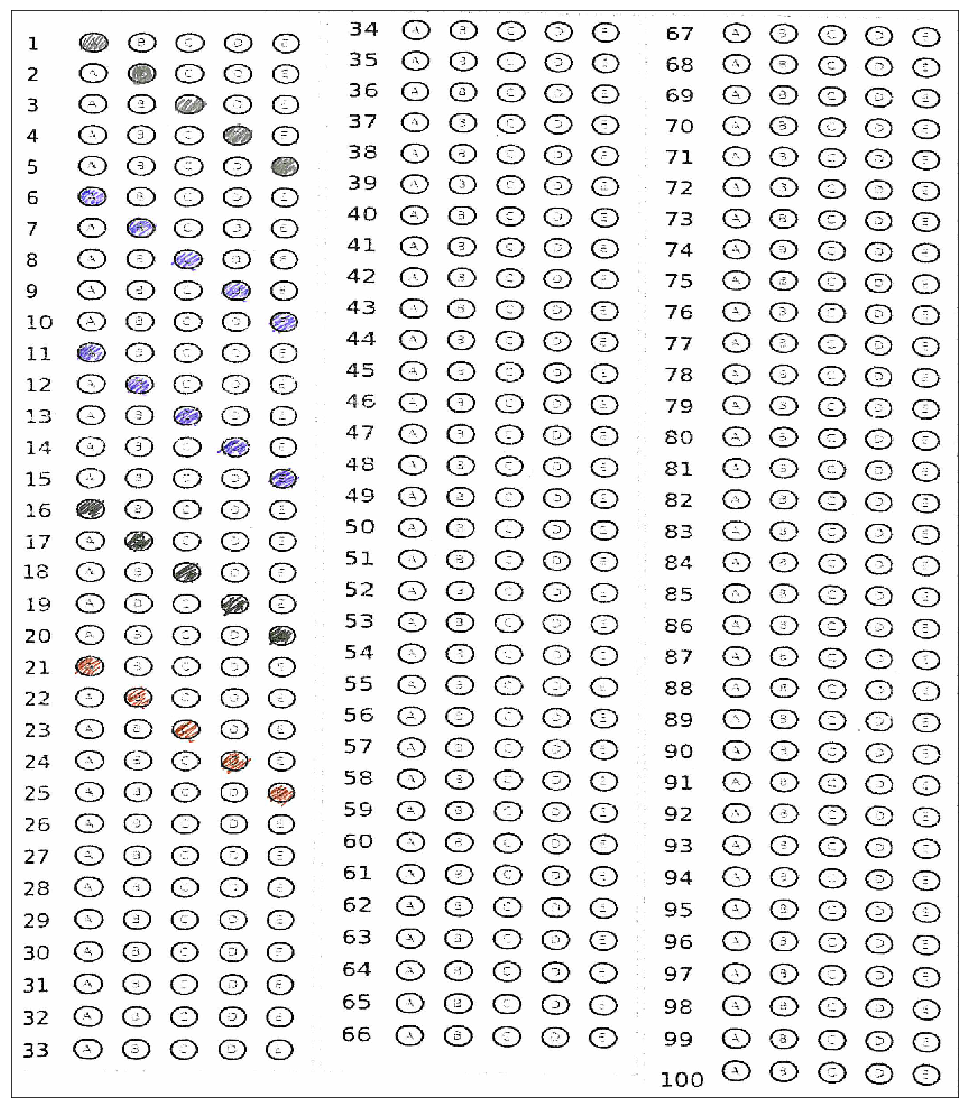

In [104]:
import numpy as np
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(20,20))

im = ax.imshow(output)
ax.set_xticks([])
ax.set_yticks([])

circles = cv2.HoughCircles(th3, cv2.HOUGH_GRADIENT, 0.5, 10)


if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
 
    for (x, y, r) in circles:
        print (x,y,r)
#         cv2.circle(output, (x, y), r, (0, 255, 0), 4)
#         cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        circ = patches.Circle((x,y), radius=10)
        
        ax.add_patch(circ)





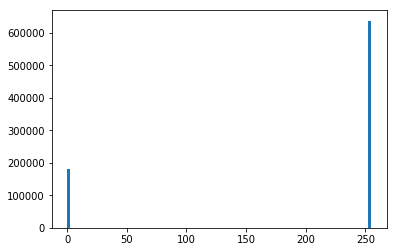

In [109]:
import SimpleITK as sitk

# img[img < 100] = 0
s_img = sitk.GetImageFromArray(th3)


plt.figure()
plt.hist(sitk.GetArrayViewFromImage(s_img).flatten(), bins=100)
plt.show()

# s_img = sitk.GetImageFromArray(laplacian)


# plt.figure()
# plt.hist(sitk.GetArrayViewFromImage(s_img).flatten(), bins=100)
# plt.show()

In [110]:
# import SimpleITK as sitk

# img[laplacian < 100] = 0
# s_img = sitk.GetImageFromArray(laplacian)


# plt.figure()
# plt.hist(sitk.GetArrayViewFromImage(s_img).flatten(), bins=100)
# plt.show()

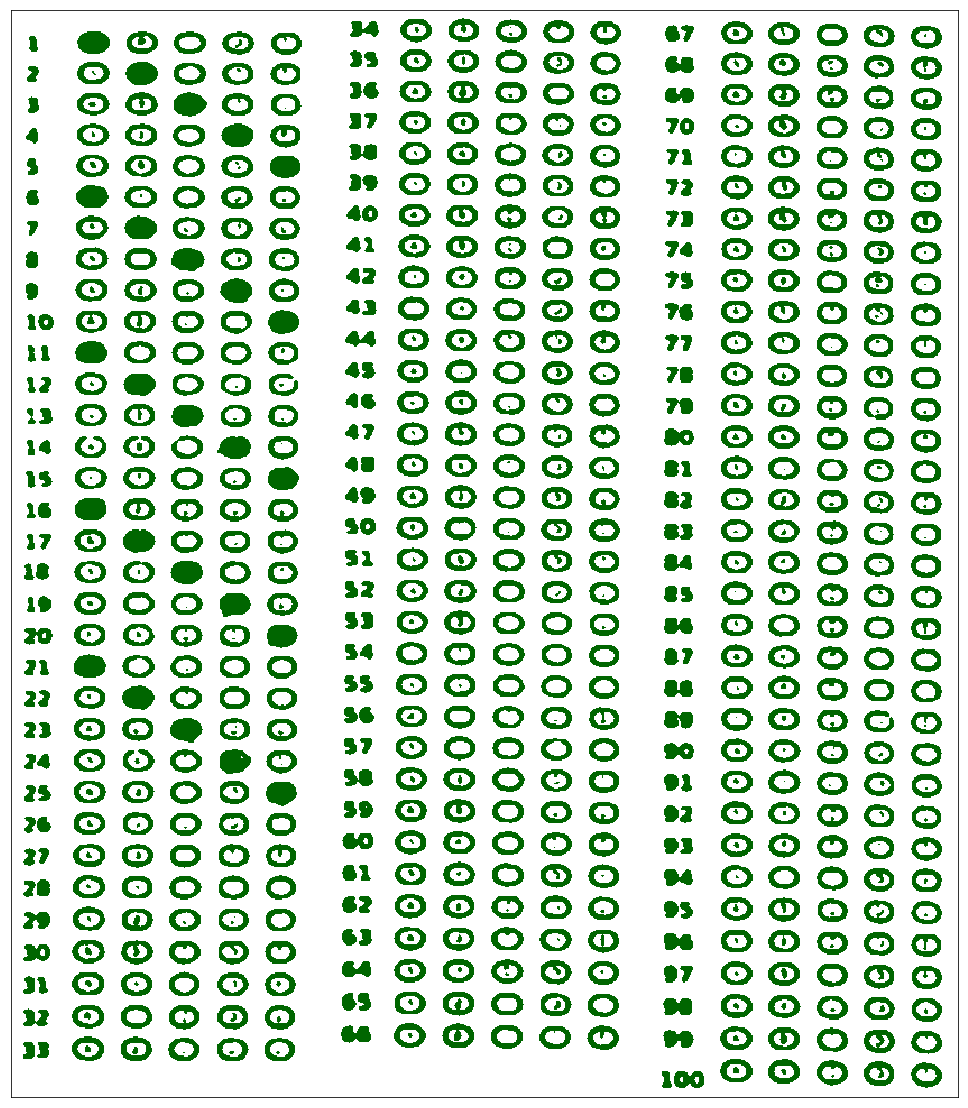

In [166]:
threshold_filters = {'Otsu': sitk.OtsuThresholdImageFilter(),
                     'Triangle' : sitk.TriangleThresholdImageFilter(),
                     'Huang' : sitk.HuangThresholdImageFilter(),
                     'MaxEntropy' : sitk.MaximumEntropyThresholdImageFilter()}

filter_selection = 'Manual'
try:
    thresh_filter = threshold_filters[filter_selection]
    thresh_filter.SetInsideValue(0)
    thresh_filter.SetOutsideValue(1)
    thresh_img = thresh_filter.Execute(s_img)
    thresh_value = thresh_filter.GetThreshold()
except KeyError:
    thresh_value = 120
    thresh_img = s_img<thresh_value
    
result = sitk.LabelOverlay(s_img, thresh_img)


fig, ax = plt.subplots(figsize=(20,20))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(sitk.GetArrayViewFromImage(result))
plt.show()

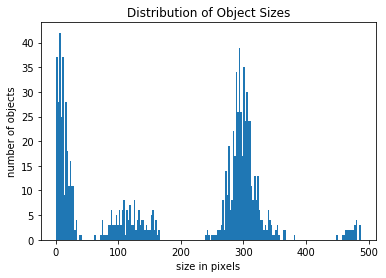

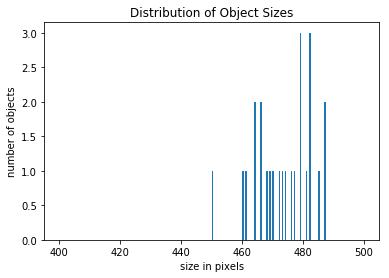

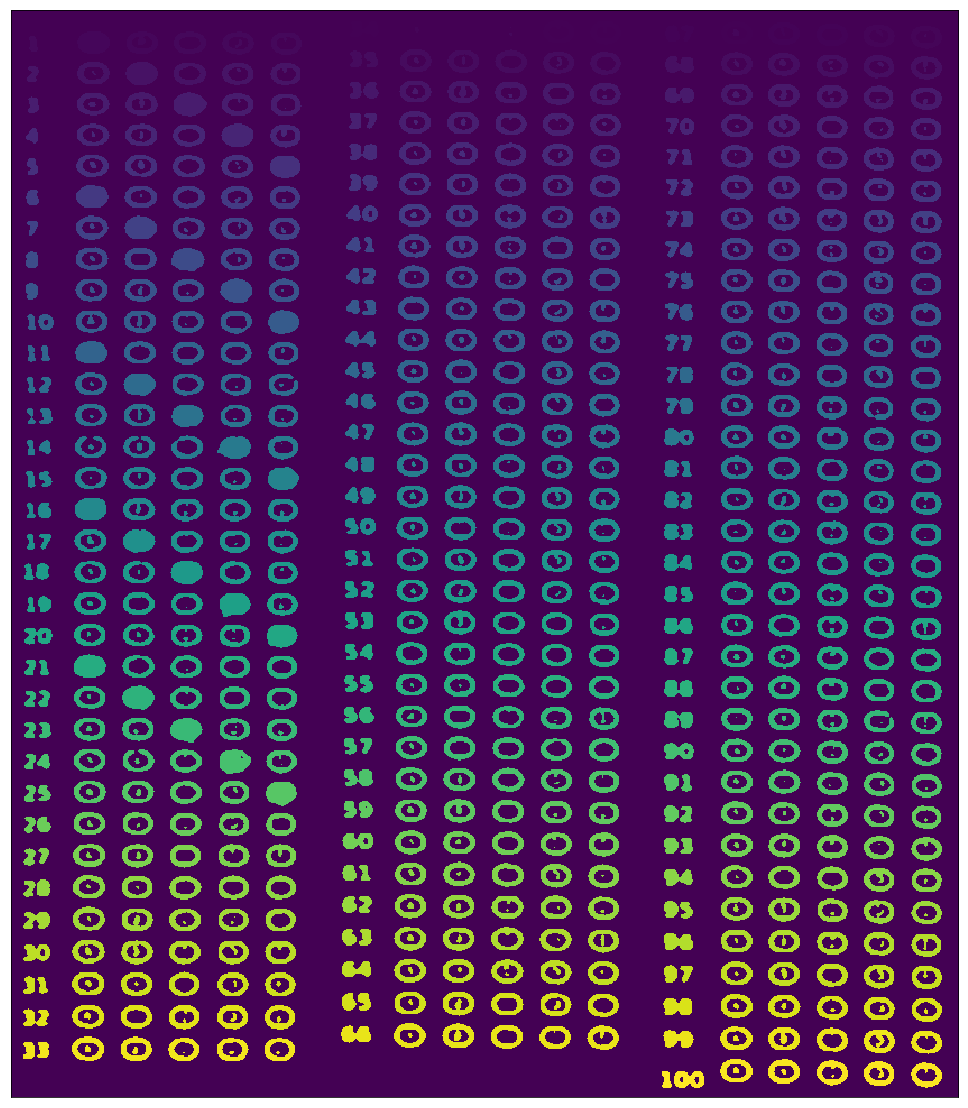

(59, 20, 29, 20)
(102, 47, 29, 21)
(145, 74, 30, 22)
(187, 102, 29, 21)
(231, 131, 27, 20)
(58, 157, 29, 20)
(101, 184, 29, 21)
(143, 213, 30, 21)
(186, 240, 29, 22)
(229, 268, 28, 22)
(57, 296, 29, 20)
(100, 325, 29, 20)
(143, 353, 29, 20)
(184, 381, 30, 20)
(229, 408, 28, 21)
(57, 436, 28, 20)
(100, 464, 29, 21)
(142, 492, 29, 21)
(186, 521, 28, 21)
(228, 549, 28, 21)
(56, 575, 29, 21)
(99, 603, 29, 22)
(142, 632, 29, 22)
(186, 660, 28, 22)
(227, 689, 28, 22)
['Abort', 'AddCommand', 'ComputeFeretDiameterOff', 'ComputeFeretDiameterOn', 'ComputeOrientedBoundingBoxOff', 'ComputeOrientedBoundingBoxOn', 'ComputePerimeterOff', 'ComputePerimeterOn', 'DebugOff', 'DebugOn', 'Execute', 'GetBackgroundValue', 'GetBoundingBox', 'GetCentroid', 'GetComputeFeretDiameter', 'GetComputeOrientedBoundingBox', 'GetComputePerimeter', 'GetDebug', 'GetElongation', 'GetEquivalentEllipsoidDiameter', 'GetEquivalentSphericalPerimeter', 'GetEquivalentSphericalRadius', 'GetFeretDiameter', 'GetFlatness', 'GetGlobal

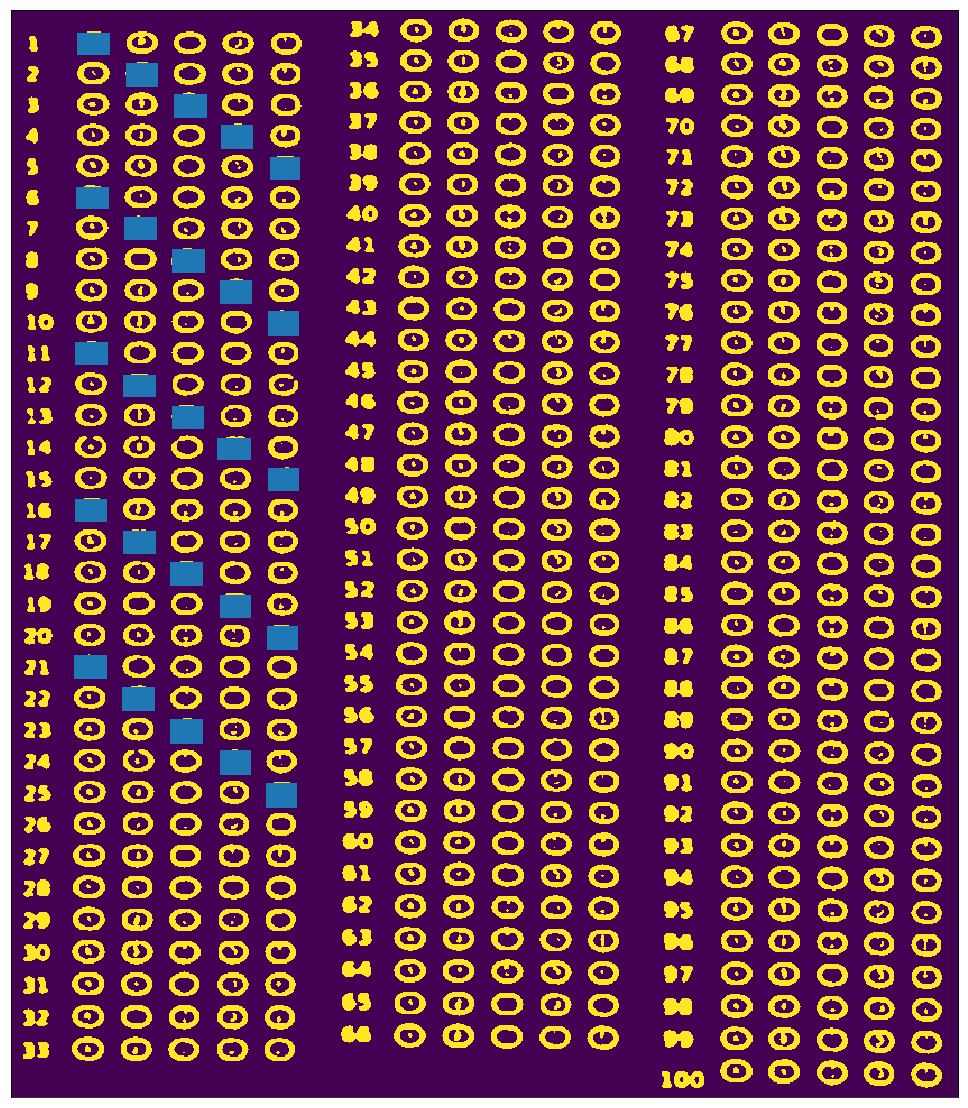

In [167]:
stats = sitk.LabelShapeStatisticsImageFilter()
stats.Execute(sitk.ConnectedComponent(thresh_img))

label_sizes = [ stats.GetNumberOfPixels(l) for l in stats.GetLabels() if l != 1]

plt.figure()
plt.hist(label_sizes,bins=200)
plt.title("Distribution of Object Sizes")
plt.xlabel("size in pixels")
plt.ylabel("number of objects")
plt.show()


plt.figure()
plt.hist(label_sizes,bins=200, range=(400,500))
plt.title("Distribution of Object Sizes")
plt.xlabel("size in pixels")
plt.ylabel("number of objects")
plt.show()


fig, ax = plt.subplots(figsize=(20,20))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(sitk.GetArrayViewFromImage(sitk.ConnectedComponent(thresh_img)))
plt.show()

fig, ax = plt.subplots(figsize=(20,20))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(sitk.GetArrayViewFromImage(sitk.ConnectedComponent(thresh_img))>0)
for l in stats.GetLabels():
    if stats.GetNumberOfPixels(l) > 400: 
        print (stats.GetBoundingBox(l))
        
        cx, cy = stats.GetCentroid(l)
        
        box_x, box_y, box_w, box_h = stats.GetBoundingBox(l)
        
        rect = patches.Rectangle((box_x, box_y), box_w, box_h)
        
        ax.scatter(cx, cy, marker='o')
        ax.add_patch(rect)
        
        
print (dir(stats))

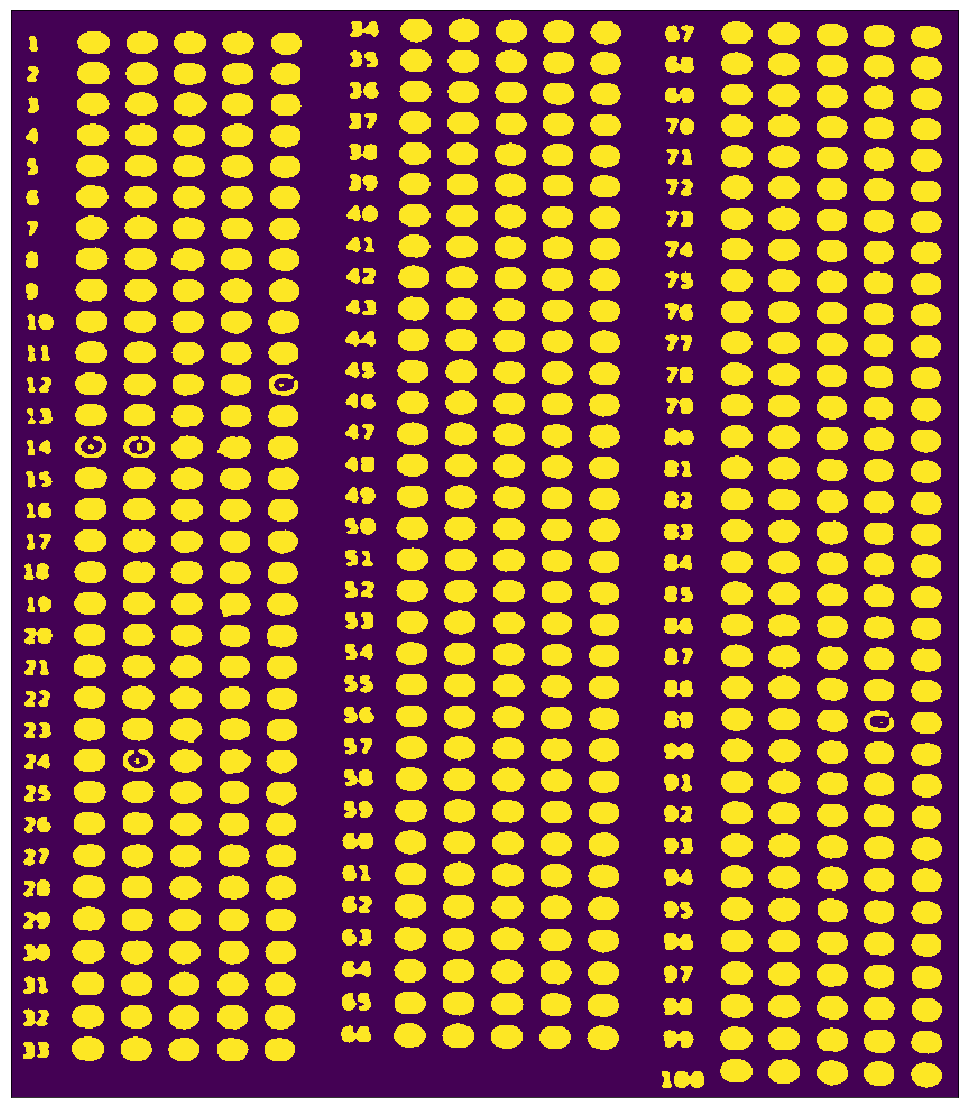

In [175]:
# cleaned_thresh_img = sitk.BinaryOpeningByReconstruction(thresh_img, [10, 10, 10])
cleaned_thresh_img = sitk.BinaryClosingByReconstruction(thresh_img, [10, 10, 10])




fig, ax = plt.subplots(figsize=(20,20))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(sitk.GetArrayViewFromImage(cleaned_thresh_img))
plt.show()


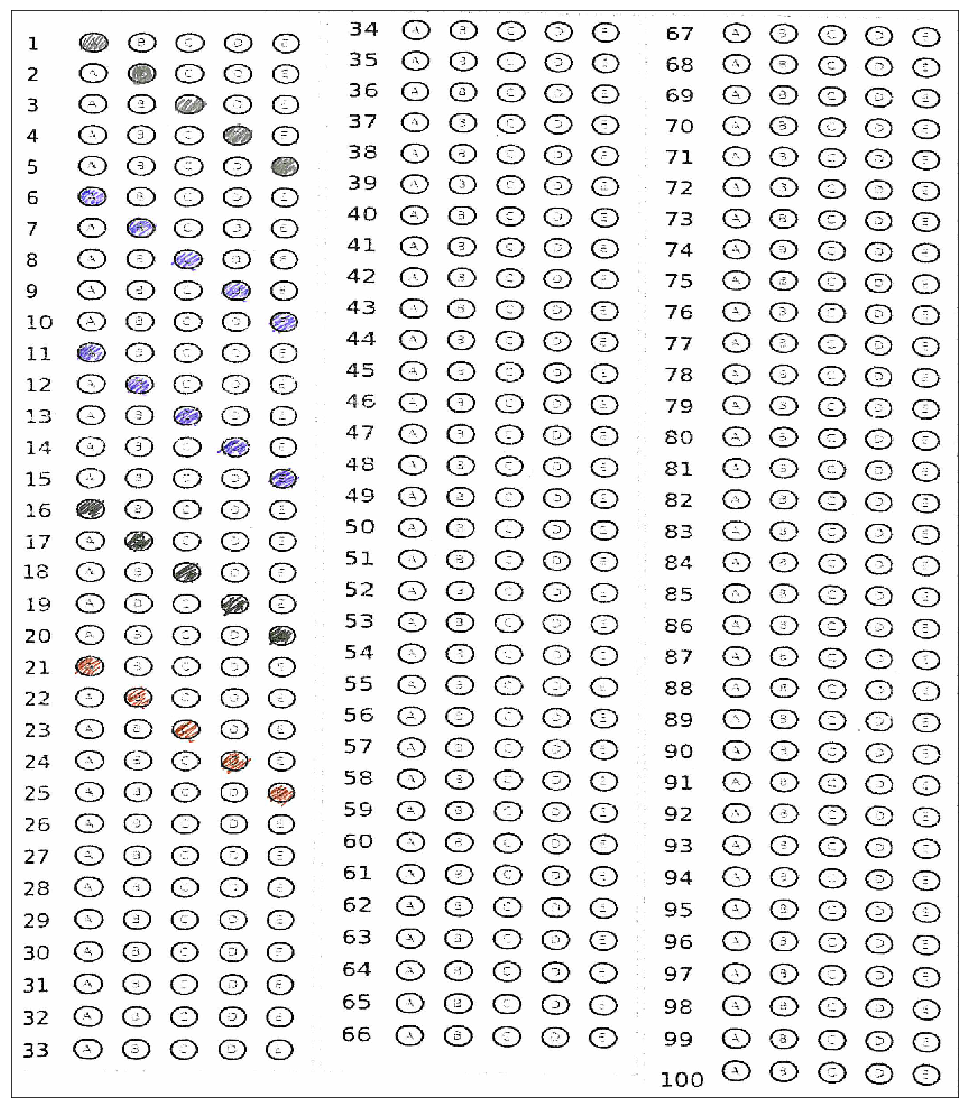

In [115]:
fig, ax = plt.subplots(figsize=(20,20))

im = ax.imshow(output)
ax.set_xticks([])
ax.set_yticks([])

circles = cv2.HoughCircles(sitk.GetArrayViewFromImage(cleaned_thresh_img),
                           cv2.HOUGH_GRADIENT, 0.5, 10)


if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
 
    for (x, y, r) in circles:
#         print (x,y,r)
        circ = patches.Circle((x,y), radius=10)
        
        ax.add_patch(circ)


plt.show()
